# Assignment: BA model and scale-free networks

## 1. Implement BA algorithm
For this assignment you will be implementing the BA algorithm from the reading (see [Barabasi Ch 5.3](http://barabasi.com/networksciencebook/)). Create a function that takes `n` the number of nodes for the graph, and `m0` the initial number of nodes, as arguments and returns a networkx graph with a scale-free degree distribution.

The first step is figuring out how to do "preferential attachment" based on the degree of existing nodes. A brute-force way to do this is creating a huge list with duplicated items. Say, node 1's degree is 6, node 2's degree is 3, and node 3's degree is 2. (This is not a 'graphical' sequence. But for the sake of simplicity let's just assume that.) Then, we can create the following list to *preferentially sample* nodes from the network. 

In [1]:
alist = [1,1,1,1,1,1,2,2,2,3,3]

1 is repeated 6 times, 2 is repeated 3 times, and so on. Now if we randomly sample from this list, we will be three times more like to sample node 1 than node 3!

In [2]:
import random

random.sample(alist, 1)

[1]

So, if you can maintain this list for your network, you can implement preferential attachment. Simply update this list whenever you add an edge! 

A more space-efficient way is using `numpy`'s sampling method. If you run the following cell, the documentation for the [`np.random.choice`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) function will appear. 

In [3]:
import numpy as np

np.random.choice?

It accepts `p` parameter and you can specifies the probability of each item in the list! So instead of creating

In [4]:
alist = [1,1,1,1,1,1,2,2,2,3,3]

You can do

In [5]:
nodes = [1,2,3]
degrees = [6,3,2]
sum_degrees = sum(degrees)
node_probs = [degree*1.0/sum_degrees for node, degree in zip(nodes,degrees)] 
node_probs

[0.5454545454545454, 0.2727272727272727, 0.18181818181818182]

In [6]:
np.random.choice(nodes, p=node_probs)

1

or sample two nodes from the list. 

In [7]:
np.random.choice(nodes, 2, replace=False, p=node_probs)

array([3, 2])

Ok, now the sampling can be done. How about the initial graph with `m0` nodes? `networkx` has a convenient function for that: https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html 

Can you create a complete graph with 5 nodes and then check the edges to make sure you have the right graph? 

In [8]:
# Implement ---
import networkx as nx
G = nx.complete_graph(5)
nx.edges(G)

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

Now you're ready to implement the BA algorithm! Create a fully-connected network with `m0` nodes. Then in each step, sample `m` nodes from the existing node pool. Add a new node and connect it to the chosen `m` nodes. 

In [9]:
def barabasi_albert_graph(n, m0, m=1):
    """Create a BA network with n nodes, where each new node connects to 
    m existing nodes according to the preferential attachment rule. The initial
    network is a clique (fully-connected network) with m0 nodes. 
    """
    # Initial network of m_o nodes (a complete graph)
    G = nx.complete_graph(m0)

    # Implement ---
    deg = nx.degree(G)
    i = m0+1
    while i < (n+1):
        B = []
        G.add_node(i)
        probabilities={}

        for nodes in G.nodes():
            add = sum([x[1] for x in deg])
            d_n = G.degree(nodes)
            vals = d_n/add
            probabilities[nodes] = vals
            B.append(vals)

    # ---

    # Until network has n nodes, 
    # 1. preferentially sample m nodes from the network,
    # 2. create a new node, 
    # 3. and connect the new node to the m selected nodes. 

    # Implement ---
        m = np.random.choice(G.nodes(),m0,p=B)
        j=0
        while j < (len(m)):
            G.add_edge(i,m.item(j))
            j=j+1
        i=i+1

    # ---
    return G  

#REFERENCE - https://github.com/AlxndrMlk/Barabasi-Albert_Network/blob/master/BA_model.ipynb

## 2. BA graph analysis
Test your algorithm by creating a graph with `N = 1200` and `m0 = 7`. Calculate (and print) the average shortest path length of the graph:

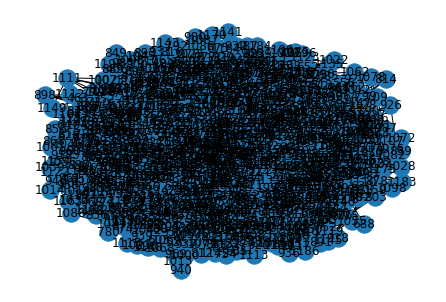

In [10]:
# Implement ---
Graph1 = barabasi_albert_graph(n=1200,m0=7,m=1)
nx.draw(Graph1,with_labels=True)

In [11]:
nx.number_of_nodes(Graph1)

1200

In [12]:
nx.number_of_edges(Graph1)

8250

In [13]:
# Calculating average shortest path length
AvgShortestPathLength=nx.average_shortest_path_length(Graph1)
print("Average Shortest Path Length = ",AvgShortestPathLength)

Average Shortest Path Length =  2.8062399221573533


Calculate (and print) the average clustering coefficient of the graph:

In [14]:
# Implement ---
# Calculating average clustering coefficient
AverageClusteringCoefficient=nx.average_clustering(Graph1)
print("Average Clustering Coefficient = ",AverageClusteringCoefficient)

Average Clustering Coefficient =  0.04231534974417565


The [cumulative distribution function (CDF) and complementary cumulative distribution function (CCDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) are among the most direct ways to identify a power-law-like distribution. Plot the **CCDF** of the graph's degree distribution. 

First, **CDF** for a discrete distribution is defined as the following:

$$ F_X(x) = P(X \le x) = \sum_{x' \le x} P(x') $$

CCDF is it's reverse and is defined as following:

$$\bar F_X(x) = P(X > x) = \sum_{x' > x} P(x') = 1 - F_X(x).$$

[]

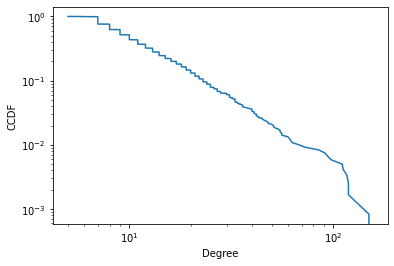

In [15]:
import matplotlib.pyplot as plt

# Implement ---
for N in [1200]:
    degree_dictionary = dict(Graph1.degree())
    D = [degree_dictionary[i] for i in degree_dictionary.keys()]
    Sorted_Degrees = np.sort(D)
    Arranged = np.arange(1., N+1)
    CCDF = 1 - Arranged/N 
    #Plotting the graph on a loglog scale.
    plt.loglog(Sorted_Degrees,CCDF) 
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.plot() 
# ---

## 3. BA and ER comparison

Now let's compare the scale-free and random graphs. Create a random graph with the same number of nodes and about the same number of edges, then calculate the average shortest path length of that graph:

Note: Please extract the largest connected component (using networkx) and calculate the average path length of that component

In [16]:
# Implement ---
nodes = 1200 
# Required edges 8250 (from above graph)
p = 0.01147
seed = 42  
Graph2 = nx.erdos_renyi_graph(nodes,p,seed,directed=False)
nx.info(Graph2)

'Graph with 1200 nodes and 8245 edges'

In [17]:
# Calculating average shortest path length
AvgShortestPathLength=nx.average_shortest_path_length(Graph2)
print("Average Shortest Path Length = ",AvgShortestPathLength)

Average Shortest Path Length =  2.964752571587434


Calculate (and print) the average clustering coefficient of the graph:

In [18]:
# Implement ---
# Calculating average clustering coefficient
AverageClusteringCoefficient=nx.average_clustering(Graph2)
print("Average Clustering Coefficient = ",AverageClusteringCoefficient)

Average Clustering Coefficient =  0.011071443323817492


Now plot the CCDF of the degree distribution of the random graph:

[]

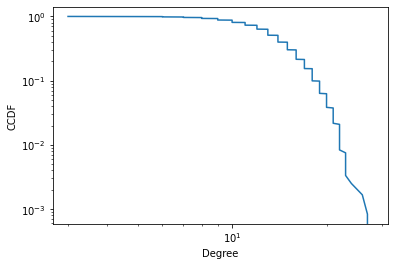

In [19]:
# Implement ---
for N in [1200]:
    degree_dictionary = dict(Graph2.degree())
    D = [degree_dictionary[i] for i in degree_dictionary.keys()]
    Sorted_Degrees = np.sort(D)
    Arranged = np.arange(1., N+1)
    CCDF = 1 - Arranged/N 
    #Plotting the graph on a loglog scale.
    plt.loglog(Sorted_Degrees,CCDF) 
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.plot() 

How do the average shortest path lengths, average clustering coefficients, and degree distributions between the graphs compare?

The average shortest path lengths of BA graph and Random graph is almost the same.
The average clustering coefficient of BA graph is slightly high comapred to Random graph.
The BA algorithm from scratch shows power law distribution  as we can see that the small number of degrees are clustered at the top of the distribution.
From the degree distributions, we can say that Random graph shows poisson distribution.

## 4. Preferential attachment without using the degree

As you know from the discussion and videos, it is possible to achieve the linear preferential attachment without calculating the degree by using the friendship paradox. Implement this version and see whether you can get a power-law degree distribution.  

In [20]:
# Implement ---
def Degreeless(n1,m01,m1=1):
    G = nx.complete_graph(m01)
    i = m01+1
    while i<(n1+1):
        G.add_node(i)
        e_view = np.array(G.edges())
        ran = np.random.choice(len(e_view),1)
        X = e_view[ran]
        Y = X[0]
        m1=np.random.choice(Y,1)
        G.add_edge(i,m1.item(0))
        i=i+1
    return G

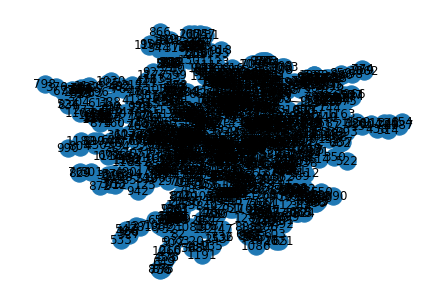

In [21]:
Graph3 = Degreeless(n1=1200,m01=7,m1=1)
plt.figure()
nx.draw(Graph3, with_labels=True)
plt.show()

In [22]:
# Calculating average shortest path length
AvgShortestPathLength=nx.average_shortest_path_length(Graph3)
print("Average Shortest Path Length = ",AvgShortestPathLength)

Average Shortest Path Length =  6.397328329163192


In [24]:
# Implement ---
# Calculating average clustering coefficient
AverageClusteringCoefficient=nx.average_clustering(Graph3)
print("Average Clustering Coefficient = ",AverageClusteringCoefficient)

Average Clustering Coefficient =  0.00013077420614025467


[]

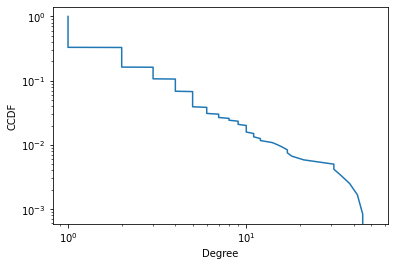

In [25]:
# Implement ---
for N in [1200]:
    degree_dictionary = dict(Graph3.degree())
    D = [degree_dictionary[i] for i in degree_dictionary.keys()]
    Sorted_Degrees = np.sort(D)
    Arranged = np.arange(1., N+1)
    CCDF = 1 - Arranged/N 
    #Plotting the graph on a loglog scale.
    plt.loglog(Sorted_Degrees,CCDF) 
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.plot() 

We, can clearly see that the BA without usage of degree graph follows power law distribution.